# Impl hiperparametros

In [4]:
# Downloading input data
from sklearn.datasets import load_boston
# house-prices dataset download
X, y = load_boston(return_X_y=True)
print(X.shape,y.shape)

(506, 13) (506,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, regressor.predict(X_train))) #Para entender se tem overfitting
mean_absolute_error(y_test, y_pred)

0.0


2.867664670658683

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3, 21), "criterion": ["squared_error", "absolute_error"]} #Aqui escolhemos otimizar o critério de validação.

reg = DecisionTreeRegressor(random_state=0)


grd = GridSearchCV(reg, parameters, scoring="neg_mean_absolute_error") #aqui no scoring vc escolhe qual validação ele deve tentar minimzar, nesse caso o MAE
grd.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': range(3, 21)},
             scoring='neg_mean_absolute_error')

In [28]:
grd.cv_results_ #Resultados do modelo

{'mean_fit_time': array([0.00279908, 0.00240011, 0.00200043, 0.00299826, 0.00359969,
        0.00440025, 0.00360475, 0.00419497, 0.00439153, 0.00400124,
        0.00479946, 0.00399733, 0.00399752, 0.00360303, 0.00347919,
        0.00399828, 0.00339794, 0.00359969, 0.00917692, 0.01299338,
        0.01198645, 0.01519942, 0.01499667, 0.01779776, 0.02020321,
        0.0190011 , 0.01905513, 0.01752434, 0.02651467, 0.02379184,
        0.02900553, 0.03080359, 0.02778864, 0.02435913, 0.02001009,
        0.01559958]),
 'std_fit_time': array([7.49367388e-04, 8.01946448e-04, 3.15073558e-06, 6.30224050e-04,
        1.02013233e-03, 1.02011626e-03, 1.20565269e-03, 7.59840124e-04,
        7.96212695e-04, 6.33426227e-04, 7.45907202e-04, 6.32345080e-04,
        6.33694901e-04, 4.93666320e-04, 4.49900683e-04, 8.94631769e-04,
        4.91342781e-04, 8.01229938e-04, 1.95756102e-03, 8.91301682e-04,
        1.89888858e-03, 1.94205014e-03, 6.37314948e-04, 2.78414965e-03,
        2.64590739e-03, 2.09705730e-0

In [30]:
grd.best_params_

{'criterion': 'squared_error', 'max_depth': 7}

In [25]:
grd.best_estimator_ # Melhores parâmetros

DecisionTreeRegressor(max_depth=7, random_state=0)

In [31]:
y_pred = grd.predict(X_test) # Quando vc da o .predict no modelo que o GridSearchCV treinou, ele já vai usar o modelo com melhores hiperparâmetros.
print(mean_absolute_error(y_train, grd.predict(X_train)))
mean_absolute_error(y_test, y_pred)

1.2444872504633044


2.716956348023625

## Random Forest grid search

In [32]:
parameters = {'max_depth':range(5, 8), "n_estimators": range(60, 70)}


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'max_depth':range(3, 10), "n_estimators": range(50, 100)} #Aqui escolhemos otimizar o n_estimators, ou seja, o número de árvores
reg = RandomForestRegressor(max_depth=6, random_state=0, n_jobs=-1) 
#n_jobs é a quantidade de "rodagens" em paralelo, colocando -1 vc deixa o python usar toda a capacidade da sua máquina.


grd = GridSearchCV(reg, parameters, scoring="neg_mean_absolute_error")
grd.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=6, n_jobs=-1,
                                             random_state=0),
             param_grid={'max_depth': range(3, 10),
                         'n_estimators': range(50, 100)},
             scoring='neg_mean_absolute_error')

In [35]:
grd.best_params_

{'max_depth': 9, 'n_estimators': 80}

In [34]:
grd.best_estimator_

RandomForestRegressor(max_depth=9, n_estimators=80, n_jobs=-1, random_state=0)

In [36]:
y_pred = grd.predict(X_test)
print(mean_absolute_error(y_train, grd.predict(X_train)))
mean_absolute_error(y_test, y_pred)

1.0680405639317379


2.2281270582126664

Implementaçao na mao do **Gradient Descent Algorithm**

In [40]:
y_pred.shape

(506, 13)

In [41]:
y.shape

(506,)

In [54]:
X=X[:,5]
X.shape

(506,)

In [56]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs):
    y_pred = m*X + c  # The current predicted value of y
    D_m = (-2/n) * sum(X * (y - y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print(m, c)

3.5759937183682804 0.4754543973042576


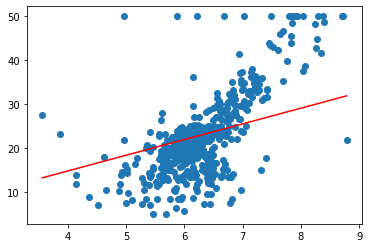

In [58]:
# Making predictions
import matplotlib.pyplot as plt
y_pred = m*X + c

plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')  # regression line
plt.show()

# Otimização na mão dos hiperparâmetros de um árvore de decisão

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

print(X[:5])
print()
print(y[:5])

[[0.00057187]
 [0.09144139]
 [0.09683479]
 [0.13693797]
 [0.19527392]]

[-1.1493464   0.09131401  0.09668352  0.13651039  0.19403525]


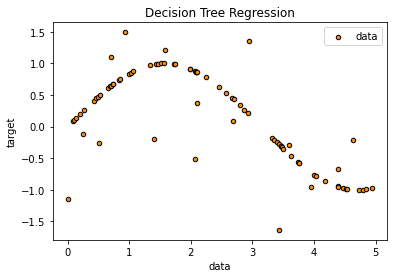

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
print(y_1[:5])
print(y_2[:5])

[0.05236068 0.05236068 0.05236068 0.05236068 0.05236068]
[-1.1493464 -1.1493464 -1.1493464 -1.1493464 -1.1493464]


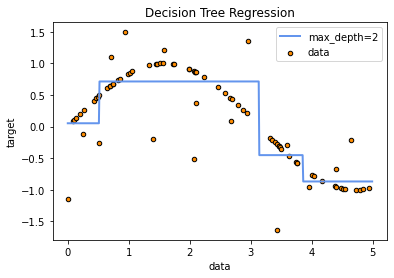

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

(Um arvore de decisao é uma **funçao escada**)

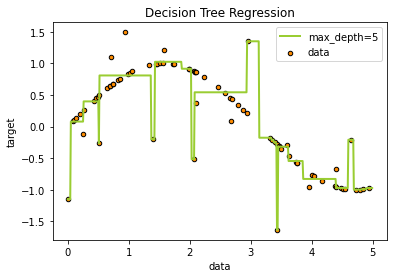

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Otimizaçao dos hiperparametros na mao

In [ ]:
# Downloading input data
from sklearn.datasets import load_boston
# house-prices dataset download
X, y = load_boston(return_X_y=True)

# Train test sets separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(339, 13)
(167, 13)


In [ ]:
from sklearn.metrics import mean_squared_error

max_depths = range(1, 50)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(mean_squared_error(y_train, model_1.predict(X_train)))

testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_test, y_test)
    testing_error.append(mean_squared_error(y_test, model_2.predict(X_test)))

## Desenho da curva da loss function **MSE** em relaçao ao hiperparametro **Tree Depth**

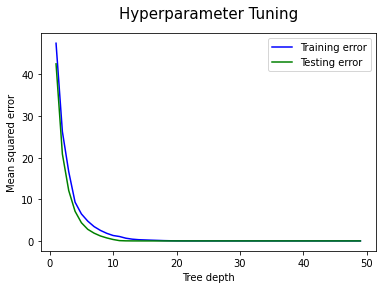

In [ ]:
# drawing the curve
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
# save figure in png format
plt.savefig('error.png')

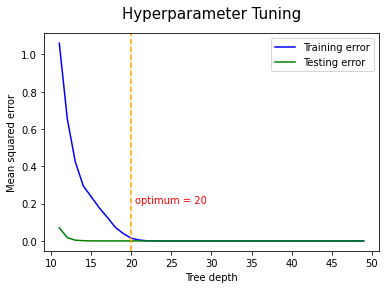

In [ ]:
# with zoom to better identify the optimal tree depth
max_depths_zoom = max_depths[10:]
training_error_zoom = training_error[10:]
testing_error_zoom = testing_error[10:]

# drawing the curve
plt.plot(max_depths_zoom, training_error_zoom, color='blue', label='Training error')
plt.plot(max_depths_zoom, testing_error_zoom, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=20, color='orange', linestyle='--')
plt.annotate('optimum = 20', xy=(20.5, 0.2), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
# save figure in png format
plt.savefig('error.png')

# Otimização na mão dos hiperparâmetros de uma Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_estimators_list = range(1, 30)
training_error = []
for n_estimators in n_estimators_list:
    model_1 = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    model_1.fit(X_train, y_train)
    training_error.append(mean_squared_error(y_train, model_1.predict(X_train)))

testing_error = []
for n_estimators in n_estimators_list:
    model_2 = RandomForestRegressor(n_estimators=n_estimators)
    model_2.fit(X_test, y_test)
    testing_error.append(mean_squared_error(y_test, model_2.predict(X_test)))

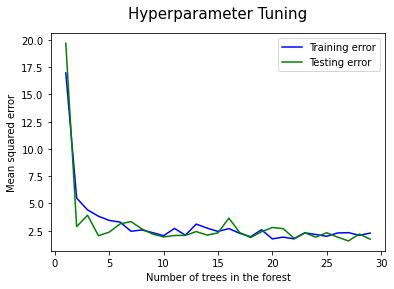

In [ ]:
# drawing the curve
plt.plot(n_estimators_list, training_error, color='blue', label='Training error')
plt.plot(n_estimators_list, testing_error, color='green', label='Testing error')
plt.xlabel('Number of trees in the forest')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
# save figure in png format
plt.savefig('error.png')

In [ ]:
np.mean(y)

22.532806324110677

A partir de 10 arvores ja, o *MSE* fica fluctuando entre 2.3 e 4.0.  
Podemos ficar com o hiperparametro `n_estimators` igual a **10** para otimizar a velocidade do treinamento e da prediçao do modelo.